In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors as colors
import matplotlib.ticker as ticker

import gif

In [2]:
DOS_TEST = np.loadtxt('DOS_0.dat').view(complex)
E = np.loadtxt('E.dat')
x = np.arange(6)

EE, X = np.meshgrid(E, x)

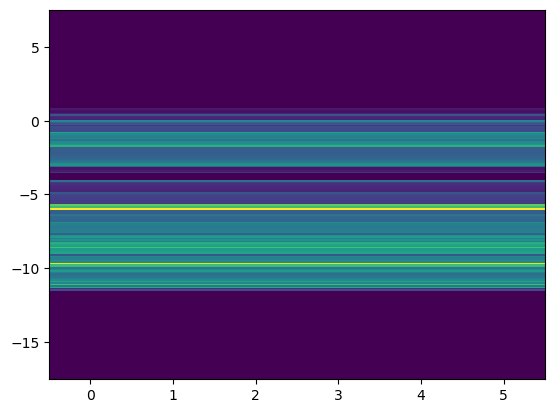

In [3]:
plt.pcolormesh(X, EE, DOS_TEST.T.real)

In [4]:
@gif.frame
def plot_standard():
    plt.pcolormesh(X, EE, DOS_TEST.T.real)

In [13]:
@gif.frame
def plot_gold(i):

    font = {'weight' : 'normal',
	'size'   : 35}
    matplotlib.rc('font', **font)
    def fmt(x, pos):
        a, b = '{:.1e}'.format(x).split('e')
        b = int(b)
        return r'${} \times 10^{{{}}}$'.format(a, b)


    def fmt_1(x, pos):
        return int(x)
    
    DOS_TEST = np.loadtxt('DOS_' + str(i) + '.dat').view(complex)
    E = np.loadtxt('E.dat')
    EFL = np.loadtxt('EFL.dat')
    EFR = np.loadtxt('EFR.dat')
    x = np.arange(6)
    x_fl = np.linspace(-0.5, 5.55, 100)
    Efl_dotted = EFL[i+1] * np.ones((7))
    Efr_dotted = EFL[i+1] * np.ones((7))

    EE, X = np.meshgrid(E, x)
    
    plt.figure(figsize = (13,12))
    ax1 = plt.gca()
    ax1.set_xlabel('Transport Direction' + ' ' + r'$\mathbf{x}$' + ' ' + r'$ [\mathbf{u.c.}]$')
    ax1.set_ylabel('Energy' + ' '  + r'$[\mathbf{eV}]$')
    plot = plt.pcolormesh(X, EE, DOS_TEST.T.real, cmap = 'gist_heat_r')
    cbar = plt.colorbar(plot, format = ticker.FuncFormatter(fmt_1))
    cbar.ax.set_ylabel('DOS' + ' ' + r'$[\mathbf{\left( eV\cdot nm ^3 \right) ^{-1}}]$')

    ax1.plot(x_fl[0:len(Efl_dotted)], Efl_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')
    ax1.plot(x_fl[-len(Efr_dotted)-1:-1], Efr_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')

    plt.text(0.00, EFL[i+1] - 0.1, r'$\mathbf{E_{FL}}$', fontsize = 27)
    plt.text(4.60, EFL[i+1] - 0.1, r'$\mathbf{E_{FR}}$', fontsize = 27)
    plt.ylim(-8, 1)

In [17]:
frames = [plot_gold(i) for i in range(30)]
gif.save(frames, 'DOS.gif', duration = 1000)

In [15]:
np.max(DOS_TEST[:, 0])

(243.24846293126961+0j)

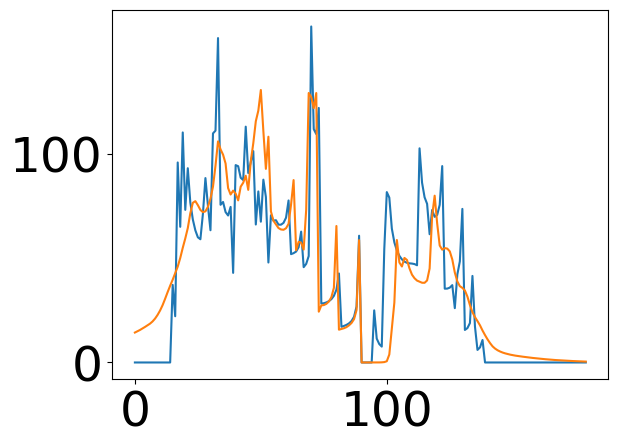

In [34]:
DOS_TEST = np.loadtxt('DOS_' + str(0) + '.dat').view(complex)

plt.plot(DOS_TEST[45:225, 0])
#DOS_TEST = np.loadtxt('DOS_' + str(1) + '.dat').view(complex)
#plt.plot(DOS_TEST[:, 1])
DOS_TEST = np.loadtxt('DOS_' + str(10) + '.dat').view(complex)
plt.plot(DOS_TEST[49:229, 3])